In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
np_data = np.loadtxt("./data/Kissler_DataS1.csv", delimiter=",")
df_data = pd.DataFrame(np_data)
df_data.columns = ['Time', 'Person1', 'Person2', 'Distance']

In [3]:
g = nx.Graph()
for i in range(np_data.shape[0]):
    t, p1, p2, d = np_data[i]
    w = 1 * np.exp(-d/10.)
    if g.has_edge(p1, p2):
        g[p1][p2]['weight'] += w
    else:
        g.add_edge(p1, p2, weight=w)
        
top_degrees = set([int(n[0]) for n in sorted(g.degree, key=lambda x: x[1], reverse=True)[0:30]])

topg = nx.Graph()

for i in range(np_data.shape[0]):
    t, p1, p2, d = np_data[i]
    if p1 not in top_degrees or p2 not in top_degrees:
        continue
    w = 1 * np.exp(-d/10.)
    if topg.has_edge(p1, p2):
        topg[p1][p2]['weight'] += w
    else:
        topg.add_edge(p1, p2, weight=w)

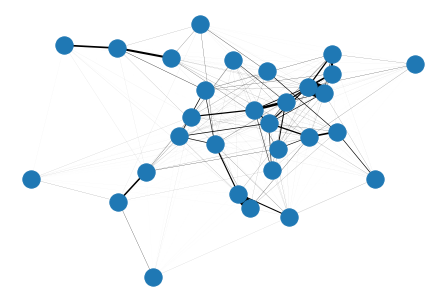

In [4]:
widths = [topg[u][v]['weight']/10 for u,v in topg.edges()]

# Layouts: https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout
pos = nx.spring_layout(topg)
# pos = nx.spectral_layout(topg)

nx.draw(topg, pos, width=widths)